In [1]:
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from tqdm.notebook import tqdm
from helpers import *
from matplotlib.cm import ScalarMappable
%matplotlib inline

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
b0, data1 = parse('20060504_072852_NOAA_12.m.pro')
data1 = data1.astype(float)
data1[data1 < 0] = -1000

In [3]:
b0, data2 = parse('20060504_125118_NOAA_17.m.pro')
data2 = data2.astype(float)
data2[data2 < 0] = -1000

In [4]:
point_coors = []
for x in range(380, 663, 20):
    for y in range(615, 891, 20):
        point_coors.append([y, x])
wind_size = (21, 21)
vicinity_size = (100, 100)

In [5]:
data1 = torch.tensor(data1).cuda()
data2 = torch.tensor(data2).cuda()

In [6]:
new_coors = []
scores = []

imgs = None

for point_coor in tqdm(point_coors):
    imgs = find_best_match_cuda(data1, data2, point_coor, 
                                  wind_size, vicinity_size, ssim_cuda, 
                                  mode='max')
    break
    new_coors.append(new_coor)
    scores.append(score)

# new_coors = np.array(new_coors)
# point_coors = np.array(point_coors)
# scores = np.array(scores)

  0%|          | 0/210 [00:00<?, ?it/s]

torch.Size([1, 441]) torch.Size([6242, 441]) torch.Size([]) torch.Size([6242]) torch.Size([441]) torch.Size([6242, 441]) torch.Size([]) torch.Size([6242])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [15]:
imgs.shape

torch.Size([6242, 441])

In [16]:
imgs

tensor([[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
        [531., 472., 489.,  ..., 586., 587., 574.],
        [472., 489., 479.,  ..., 587., 574., 570.],
        ...,
        [675., 675., 675.,  ..., 682., 682., 682.],
        [675., 675., 678.,  ..., 682., 682., 682.],
        [675., 678., 677.,  ..., 682., 682., 680.]])

In [33]:
perc = .7
idx = np.argsort(scores)
gv_idx = idx[int(-len(idx)*perc):]

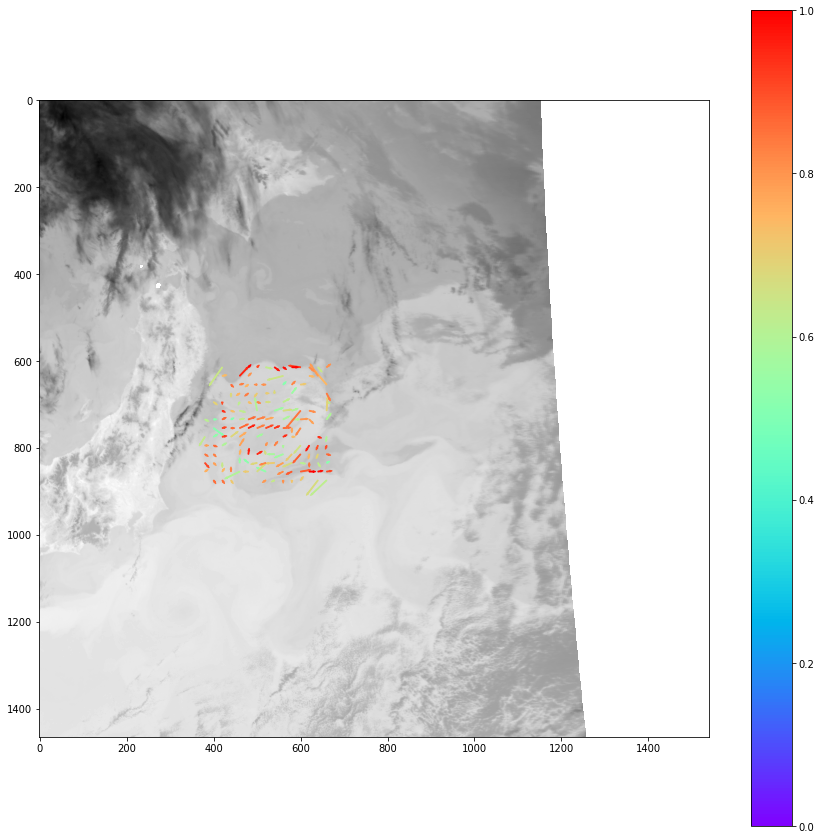

In [34]:
colors = ScalarMappable(cmap='rainbow').to_rgba(scores)

fig = plt.figure(figsize=(15, 15))
plt.imshow(data1, cmap='gray')
for x1, y1, x2, y2, color in zip(point_coors[:, 1][gv_idx], point_coors[:, 0][gv_idx], 
                                 new_coors[:, 1][gv_idx], new_coors[:, 0][gv_idx], colors[gv_idx]):
    plt.arrow(x1, y1, x2-x1, y2-y1, width=2, head_width=4, color=color)
fig.colorbar(ScalarMappable(cmap='rainbow'))
#plt.scatter(point_coors[:, 1], point_coors[:, 0])
# for i in range(len(point_coors)):
#     plt.plot([point_coors[i][1], new_coors[i][1]], [point_coors[i][0], new_coors[i][0]], c='r')
#plt.scatter([point_coor[0]], [point_coor[1]])
plt.show()

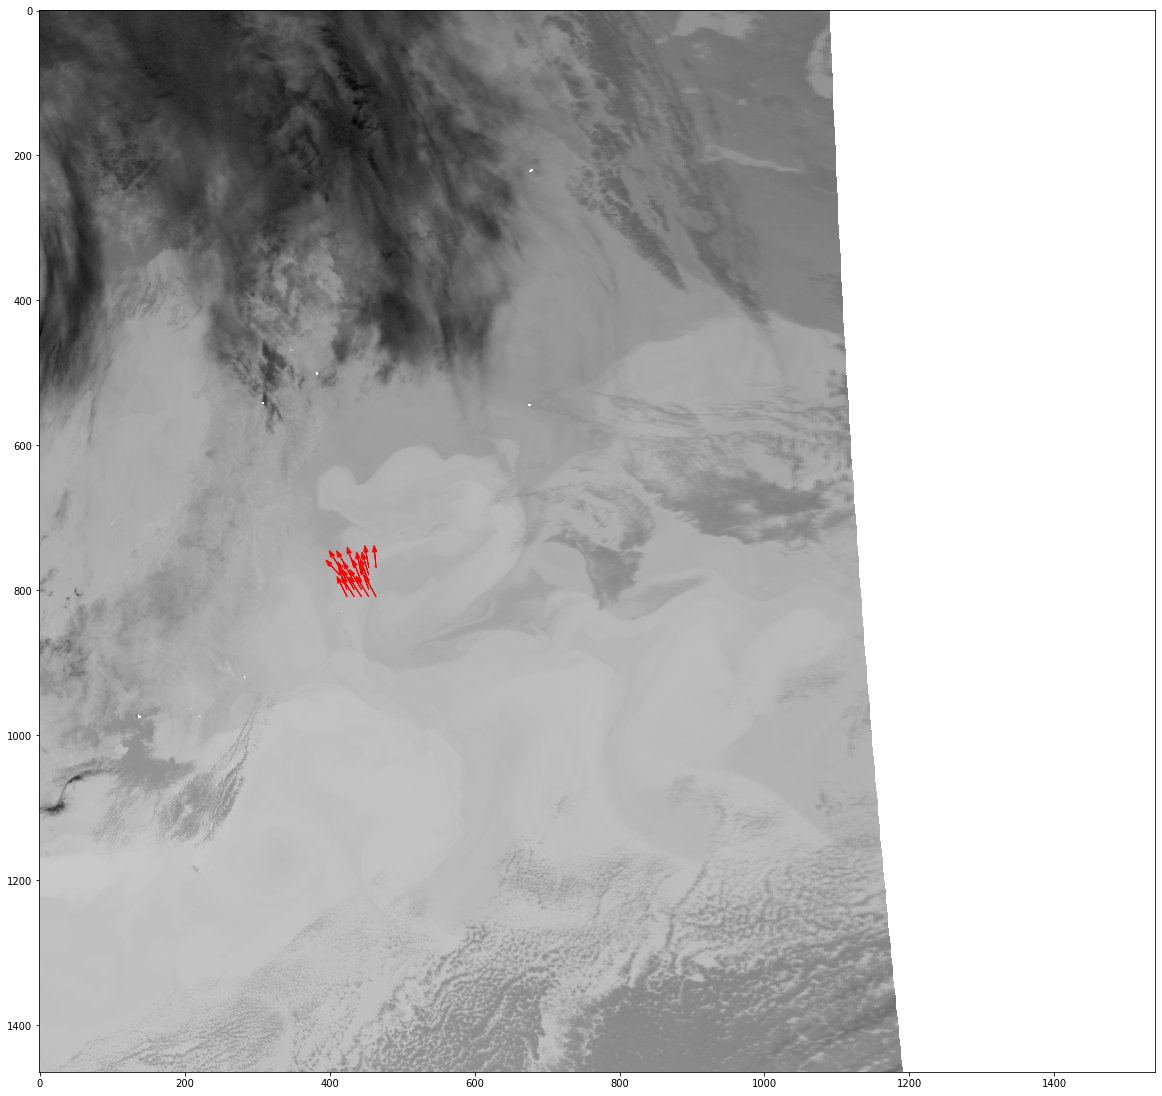

In [15]:
plt.figure(figsize=(20, 20))
plt.imshow(data2, cmap='gray')
for x1, y1, x2, y2 in zip(point_coors[:, 1], point_coors[:, 0], new_coors[:, 1], new_coors[:, 0]):
    plt.arrow(x1, y1, x2-x1, y2-y1, head_width=6, color='r')
#plt.scatter(point_coors[:, 1], point_coors[:, 0])